In [1]:
from platform import python_version
python_version()

'3.8.6'

In [2]:
!which python #conda environment: mlp

/cfs/home/ludo4644/.local-co/envs/scalableML/bin/python


In [6]:
from newsapi import NewsApiClient
import datetime
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np

def standard_plot(w=10,h=4,fontsize=14):
    fig = plt.figure(figsize=(w,h))
    plt.rcParams.update(plt.rcParamsDefault)
    plt.rcParams.update({'font.size': fontsize})
    plt.rcParams['font.family'] = 'DejaVu Sans'
    #plt.rc('text', usetex=True)
    return plt.gca()

In [4]:
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Masking, Embedding

2023-01-02 10:43:13.232426: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [5]:
model = Sequential()

# Recurrent layer
model.add(LSTM(64, return_sequences=False, dropout=0.1, recurrent_dropout=0.1))

2023-01-02 10:43:15.920732: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-01-02 10:43:15.921647: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-01-02 10:43:16.152104: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:81:00.0 name: NVIDIA A100-PCIE-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-01-02 10:43:16.152151: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2023-01-02 10:43:16.155924: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2023-01-02 10:43:16.156006: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2

# NewsAPI

In [116]:
# Create a NewsAPI client
client = NewsApiClient(api_key='44f458484d714ccaa616e4c042d91218')

In [117]:
# Fetch the latest news articles from the BBC

# Set the date range for the news articles (last month)
today = datetime.datetime.today()
last_month = today - datetime.timedelta(days=30)

# Fetch all Tesla news from the last month
articles = client.get_everything(q='Tesla',
                                 from_param=last_month.strftime('%Y-%m-%d'),
                                 to=today.strftime('%Y-%m-%d'))

# Print the title and description of each article
for article in articles['articles']:
    print(article['title'])
    print(article['description'])
    print()

Tesla’s latest update adds Steam games and Apple Music
Tesla’s new “Holiday Update” adds a few long-awaited new features, including the ability to play games from Steam in your car and support for Apple Music. There are also improvements to the light show mode.

Tesla accused of illegally firing two employees after they criticized Elon Musk
Two former Tesla employees say they were illegally fired after signing a letter criticizing Elon Musk. The letters addressed Tesla’s return-to-office policy and Musk’s tweets that the employees say violated Tesla’s anti-harassment policies.

Elon Musk isn’t serious about giving power to a new CEO
Elon Musk says that he’ll still be in charge of Twitter’s software and server teams after he resigns his CEO seat to “someone foolish enough” to take the job. In a recent poll, Twitter users voted in favor of him stepping down.

The EV revolution became an eventuality in 2022
It’s been a decade since the first Tesla EV made its commercial debut and the elec

In [119]:
# Create a list of dictionaries, where each dictionary represents an article
articles_list = []
for article in articles['articles']:
    articles_list.append({
        'title': article['title'],
        'author': article['author'],
        'description': article['description'],
        'url': article['url'],
        'publishedAt': article['publishedAt'],
        'source': article['source']['name'],
        'content': article['content']
    })

# Create a Pandas dataframe from the list of dictionaries
df = pd.DataFrame(articles_list)
df.head(n=2)

,title,author,description,url,publishedAt,source,content
0,Tesla’s latest update adds Steam games and App...,Jay Peters,Tesla’s new “Holiday Update” adds a few long-a...,https://www.theverge.com/2022/12/13/23508269/t...,2022-12-14T01:07:20Z,The Verge,The Steam Beta in a Tesla. | Image: Tesla\r\n\...
1,Tesla accused of illegally firing two employee...,Andrew J. Hawkins,Two former Tesla employees say they were illeg...,https://www.theverge.com/2022/12/19/23516889/t...,2022-12-19T17:01:18Z,The Verge,Tesla accused of illegally firing two employee...


In [121]:
print(df.iloc[0].title)

Tesla’s latest update adds Steam games and Apple Music


# News Sentiment
https://arxiv.org/pdf/1801.07055.pdf \
In this data set, the process to obtain these sentiment scores was carried out by
applying the framework of the qdap R package [20] with default parametrization.

data/Facebook_Economy.csv:


,IDLink,TS1,TS2,TS3,TS4,TS5,TS6,TS7,TS8,TS9,...,TS135,TS136,TS137,TS138,TS139,TS140,TS141,TS142,TS143,TS144
0,1,-1,-1,-1,-1,-1,-1,-1,-1,7,...,13,13,13,13,13,13,13,13,13,13
1,2,-1,-1,-1,-1,-1,-1,-1,-1,3,...,42,42,42,42,42,42,42,42,42,42
2,3,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,98,98,98,98,98,98,98,98,98,98
3,4,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,7,7,7,7,7,7,7,7,7,7
4,5,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,34,34,34,34,34,34,34,34,34,34


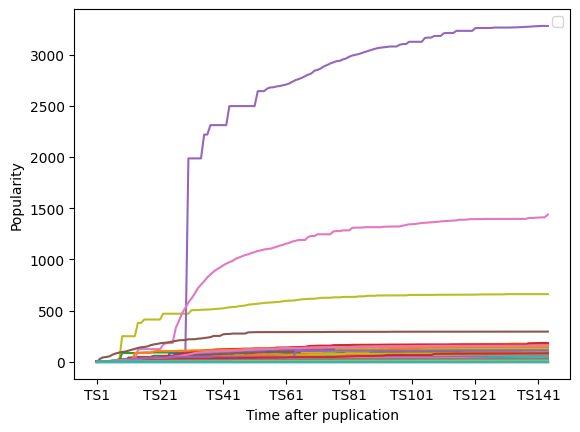

data/GooglePlus_Economy.csv:


,IDLink,TS1,TS2,TS3,TS4,TS5,TS6,TS7,TS8,TS9,...,TS135,TS136,TS137,TS138,TS139,TS140,TS141,TS142,TS143,TS144
0,1,-1,-1,-1,-1,-1,-1,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,2,-1,-1,-1,-1,-1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,23,23,23,23,23,23,23,23,23,23
3,4,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1
4,5,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0


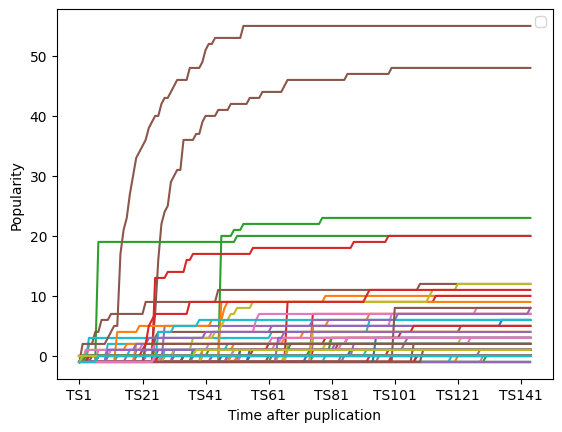

data/LinkedIn_Economy.csv:


,IDLink,TS1,TS2,TS3,TS4,TS5,TS6,TS7,TS8,TS9,...,TS135,TS136,TS137,TS138,TS139,TS140,TS141,TS142,TS143,TS144
0,1,-1,-1,-1,-1,-1,-1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
1,2,-1,-1,-1,-1,-1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0
3,4,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,10,10,10,10,10,10,10,10,10,10
4,5,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0


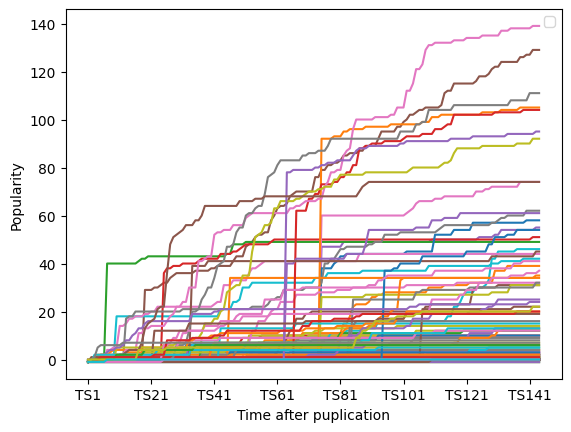

In [7]:
# Probably don't need this data!!!

df_v = {}

for social_media_response in ["data/Facebook_Economy.csv",
                              "data/GooglePlus_Economy.csv",
                              "data/LinkedIn_Economy.csv"]:
    
    # Extract
    df = pd.read_csv(social_media_response)
    
    # Print
    print(social_media_response+':')
    display(df.iloc[:5,:])
    print()  # Add a blank line after each dataframe
    
    # Save
    df_v[social_media_response] = df
    
    # Plotting
    how_many = 200

    #Splice
    df = df.iloc[:how_many, :]

    # Transpose the dataframe and plot the resulting columns
    ax = df.iloc[:how_many, 1:].T.plot(kind='line')
    ax.legend([])
    ax.set_ylabel('Popularity')
    ax.set_xlabel('Time after puplication')

    # Show the plot
    plt.show()

In [8]:

# Load the news data
df = pd.read_csv("data/News_Final.csv")

# Only use economy news
news = df[df['Topic'] == 'economy']
news = news.reset_index(drop=True)

# Drop columns we don't need 
news = news.drop(columns='Topic')
news = news.drop(columns='PublishDate')
news = news.drop(columns='Facebook')
news = news.drop(columns='GooglePlus')
news = news.drop(columns='LinkedIn')

news.head(n=20)

,IDLink,Title,Headline,Source,SentimentTitle,SentimentHeadline
0,10423.0,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,0.208333,-0.156386
1,18828.0,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,-0.425210,0.139754
2,27788.0,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,0.000000,0.026064
3,27789.0,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,0.000000,0.141084
4,27838.0,Greek economy grows 0.1 pct q/q in fourth quarter,Greece's economy expanded by 0.1 percent in la...,Reuters via Yahoo! Finance,0.000000,-0.375259
5,27811.0,Big data and the Internet of Things to add £32...,Big data analytics and the Internet of Things ...,Information Age,0.063205,0.038986
6,27826.0,Greek economy shrank 0.3 percent last year but...,Greece's economy expanded slightly in the last...,Reuters via Yahoo! Finance,-0.085645,-0.099531
7,27839.0,Sweden's economy is on fire — but here's why t...,"Sweden's economy is on a massive tear, but for...",Business Insider UK Finance via Yahoo Canada F...,0.000000,-0.014174
8,27837.0,Greek economy shrank 0.3 percent last year but...,By George Georgiopoulos ATHENS (Reuters) - Gre...,Reuters via Yahoo! Finance,-0.085645,-0.120476
9,27853.0,China cuts reserve requirements in bid to boos...,China's central bank on Monday cut the proport...,AFP via Yahoo! India News,0.291667,0.094658


33928


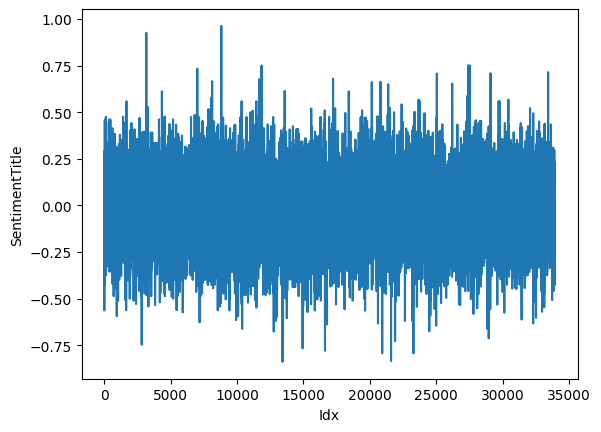

In [9]:
print(len(news['SentimentTitle']))
news['SentimentTitle'].plot()
plt.ylabel('SentimentTitle')
plt.xlabel('Idx')
plt.show()

In [10]:
# Find the maximum value and corresponding index 
max_value = news['SentimentTitle'].max()
max_index = news['SentimentTitle'].idxmax()

# Find the minimum value and corresponding index 
min_value = news['SentimentTitle'].min()
min_index = news['SentimentTitle'].idxmin()

# Print the results
print("Maximum value:", max_value)
print(news.iloc[max_index,:].Title)
print('Headline score:',news['SentimentHeadline'][max_index])
print(news.iloc[max_index,:].Headline)


print("\nMinimum value:", min_value)
print(news.iloc[min_index,:].Title)
print('Headline score:',news['SentimentHeadline'][min_index])
print(news.iloc[min_index,:].Headline)

Maximum value: 0.962353560852284
We just got some really great news about the economy
Headline score: -0.0108601257321392
The US economy created new jobs at an unexpectedly strong pace in December. There was a net increase of 292,000 jobs in the month,

Minimum value: -0.838525491562421
Improving economy not helping all
Headline score: -0.234129611399034
"""What's important to metro area economies is not just jobs,""" said Richard Shearer, a senior research analyst at the Brookings Institution.


# Use a RNN to map headlines to sentiment score

In [11]:
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Masking, Embedding

In [127]:
# Select the 'Title' column
titles = news['Title']
labels = news['SentimentTitle']

# Convert the column to a list
titles = titles.tolist()
labels = labels.tolist()

# Print the list
training_length = len(titles)
print(training_length)
print(len(labels))

33928
33928


In [128]:
def text2paddedseq(titles):

    # Tokenize the news headlines
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(titles)
    sequences = tokenizer.texts_to_sequences(titles)

    # Pad the sequences to the same length
    max_length = max([len(seq) for seq in sequences])
    print('max_length: ',max_length)
    padded_sequences = pad_sequences(sequences, maxlen=max_length)
    
    # Get the size of the vocabulary
    vocab_size = len(tokenizer.word_index) + 1  # +1 to account for 0 padding
    print('vocab_size: ',vocab_size)  # Outputs the number of unique tokens in the data
    
    return max_length, vocab_size, padded_sequences

In [129]:
max_length, vocab_size, padded_sequences = text2paddedseq(titles)

max_length:  25
vocab_size:  19569


In [15]:
"""
# Load in embeddings
glove_vectors = '/home/ubuntu/.keras/datasets/glove.6B.100d.txt'
glove = np.loadtxt(glove_vectors, dtype='str', comments=None)

# Extract the vectors and words
vectors = glove[:, 1:].astype('float')
words = glove[:, 0]

# Create lookup of words to vectors
word_lookup = {word: vector for word, vector in zip(words, vectors)}

# New matrix to hold word embeddings
embedding_matrix = np.zeros((num_words, vectors.shape[1]))

for i, word in enumerate(word_idx.keys()):
    # Look up the word embedding
    vector = word_lookup.get(word, None)

    # Record in matrix
    if vector is not None:
        embedding_matrix[i + 1, :] = vector
"""

"\n# Load in embeddings\nglove_vectors = '/home/ubuntu/.keras/datasets/glove.6B.100d.txt'\nglove = np.loadtxt(glove_vectors, dtype='str', comments=None)\n\n# Extract the vectors and words\nvectors = glove[:, 1:].astype('float')\nwords = glove[:, 0]\n\n# Create lookup of words to vectors\nword_lookup = {word: vector for word, vector in zip(words, vectors)}\n\n# New matrix to hold word embeddings\nembedding_matrix = np.zeros((num_words, vectors.shape[1]))\n\nfor i, word in enumerate(word_idx.keys()):\n    # Look up the word embedding\n    vector = word_lookup.get(word, None)\n\n    # Record in matrix\n    if vector is not None:\n        embedding_matrix[i + 1, :] = vector\n"

In [50]:
X = np.array(padded_sequences)
y = np.array(labels)
print(np.shape(X),np.shape(y))

(33928, 25) (33928,)


In [90]:
from sklearn.model_selection import train_test_split

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Split the data into training, validation, and test sets
titles_train, titles_test, _, y_temp = train_test_split(titles, y, test_size=0.2, random_state=42)
titles_val, titles_test, _, _ = train_test_split(titles_test, y_temp, test_size=0.5, random_state=42)

print(np.shape(X_train),np.shape(X_val),np.shape(X_test))
print(np.shape(titles_train),np.shape(titles_val),np.shape(titles_test))

(27142, 25) (3393, 25) (3393, 25)
(27142,) (3393,) (3393,)


In [79]:
# Different models
version = 1

if version == 1:
    model = Sequential()

    # Embedding layer
    model.add(
        Embedding(input_dim=vocab_size,
                  input_length=max_length,
                  output_dim=100,
                  #weights=[embedding_matrix],
                  trainable=True,
                  mask_zero=True))

    # Masking layer for pre-trained embeddings
    model.add(Masking(mask_value=0.0))

    # Recurrent layer
    model.add(LSTM(64, return_sequences=False, dropout=0.1, recurrent_dropout=0.1))

    # Fully connected layer
    model.add(Dense(64, activation='relu'))

    # Dropout for regularization
    model.add(Dropout(0.5))

    # Output layer
    model.add(Dense(1, activation='linear'))

elif version == 2:
    model = Sequential()
    
    # Embedding layer
    model.add(
        Embedding(input_dim=vocab_size,
                  input_length=max_length,
                  output_dim=100,
                  #weights=[embedding_matrix],
                  trainable=True,
                  mask_zero=True))
    
    model.add(keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]))
    model.add(keras.layers.SimpleRNN(20))
    
    # Output layer
    model.add(Dense(1, activation='linear'))
    
# Compile the model
model.compile(optimizer='adam', loss='mse')

In [80]:
# Early stopping
es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

cp = [es]

In [82]:
# Train the model
history = model.fit(X_train, y_train, 
                    epochs=50, 
                    batch_size=256, 
                    validation_data=(X_val, y_val),
                    callbacks=cp,
                    verbose=1)

Epoch 1/50
107/107 [==============================] - 9s 85ms/step - loss: 0.0077 - val_loss: 0.0081
Epoch 2/50
107/107 [==============================] - 9s 82ms/step - loss: 0.0054 - val_loss: 0.0069
Epoch 3/50
107/107 [==============================] - 9s 82ms/step - loss: 0.0045 - val_loss: 0.0055
Epoch 4/50
107/107 [==============================] - 9s 81ms/step - loss: 0.0038 - val_loss: 0.0052
Epoch 5/50
107/107 [==============================] - 8s 79ms/step - loss: 0.0032 - val_loss: 0.0051
Epoch 6/50
107/107 [==============================] - 9s 80ms/step - loss: 0.0029 - val_loss: 0.0052
Epoch 7/50
107/107 [==============================] - 9s 80ms/step - loss: 0.0026 - val_loss: 0.0049
Epoch 8/50
107/107 [==============================] - 9s 80ms/step - loss: 0.0025 - val_loss: 0.0050
Epoch 9/50
107/107 [==============================] - 9s 82ms/step - loss: 0.0024 - val_loss: 0.0048
Epoch 10/50
107/107 [==============================] - 9s 83ms/step - loss: 0.0022 - val_lo

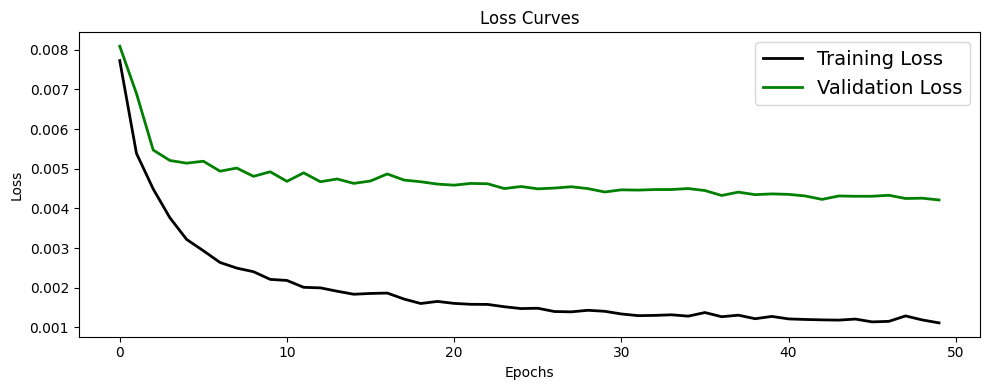

In [83]:
# Loss & Accuracycurve
standard_plot(fontsize=10)

plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

plt.tight_layout()
plt.show()


training data

Num of predicted (true) positives: 247 (212) 

Examples:
    Score 0.082 (true: 0.083): Trudeau Obama to link economy, environment at state dinner
    Score 0.121 (true: 0.094): Transportation infrastructure, economy and education top BRAC's ...
    Score -0.253 (true: -0.247): CBJ Afternoon Buzz: Economy shows growth; Consumers drop ...
    Score -0.100 (true: -0.083): CAP payments critical to N Irish economy - Phil Hogan
    Score -0.174 (true: -0.168): As China's Economy Slows, Ford Is Continuing to Find Growth
    Score -0.283 (true: -0.277): Brazilian Economy in the Throes of Recession as Zika Outbreak ...
    Score -0.225 (true: -0.219): Hillary Clinton Poses A Threat To The Gig Economy
    Score -0.075 (true: -0.073): Poor economy clipping the wings of Alberta's winter travellers
    Score 0.181 (true: 0.177): Bill Maher Rips Republicans Over California's Booming Economy
    Score 0.036 (true: 0.036): South Africa says committed to reducing constraints on economy

/tmp/ipykernel_14387/359732712.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,count)


Num of predicted (true) positives: 215 (174) 

Examples:
    Score 0.004 (true: 0.000): The Global Economy Confronts Four Geopolitical Risks
    Score -0.150 (true: -0.013): Nursultan Nazarbayev: bettering business in a rough economy
    Score -0.001 (true: 0.000): South Korea's economy grows at 2.7%
    Score 0.112 (true: 0.105): Why Uber Personifies the Best of the On-Demand Economy
    Score 0.046 (true: -0.061): India's black economy shrinking, still exceeds Thailand and ...
    Score -0.125 (true: -0.140): Adjusting to a new normal in global economy
    Score 0.175 (true: 0.176): In China, role of gov't and needs of market economy still clash
    Score 0.140 (true: 0.159): Russia is ready to consider Slovakia's interest in gas transit revenues
    Score -0.190 (true: -0.208): Economy slowdown in Indonesia gives reprieve to death row convicts
    Score -0.053 (true: 0.000): Scotland's private sector economy contracts


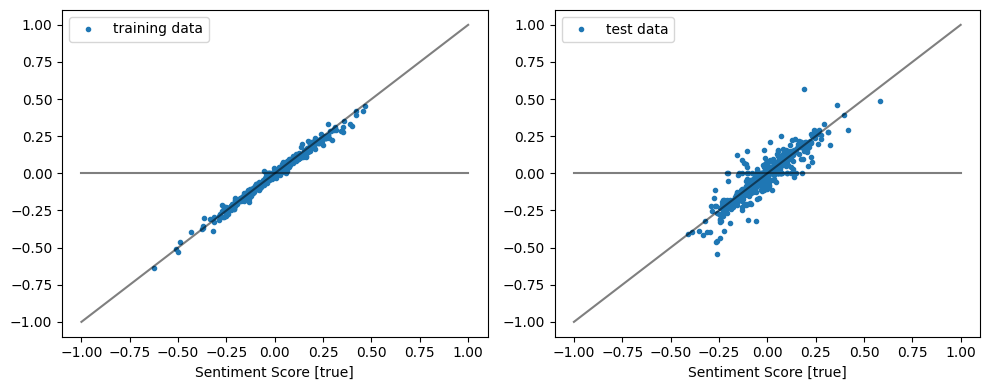

In [115]:
def count_positives(numbers):
    count = 0
    for number in numbers:
        if number > 0:
            count += 1
    return count

def predict(X_v,y_v,news_titles,num=100):
    
    standard_plot(fontsize=10)
    count = 1
    legend = ['training data','test data']
    
    for X,y,news_title,leg in zip(X_v,y_v,news_titles,legend):
        print('\n{}\n'.format(leg))
        plt.subplot(1,2,count)
        count += 1
        
        if len(X) > num:
            X,y = X[:num],y[:num]
    
        y_pred = model.predict(X)
        print('Num of predicted (true) positives: {} ({}) \n'.format(count_positives(y_pred),count_positives(y)))

        plt.plot(y_pred,y,'.')
        
        print('Examples:')
        for i in range(0,10):
            print('    Score {:.3f} (true: {:.3f}): {}'.format(y_pred[i][0],y[i],news_title[i]))
    
        plt.plot([-1,1],[-1,1],'-',c='k',alpha=0.5)
        plt.plot([-1,1],[0,0],'-',c='k',alpha=0.5)

        plt.legend([leg])
        plt.xlabel('Sentiment Score [true]')
        if count == 1:
            plt.ylabel('Sentiment Score [pred]')
    
    plt.tight_layout()
    plt.show()
        
predict([X_train,X_test],[y_train,y_test],[titles_train,titles_test],num=500)

# Test the trained network:

In [130]:
# Input
titles = [a['title'] for a in articles['articles']]

In [131]:
print(titles)

['Tesla’s latest update adds Steam games and Apple Music', 'Tesla accused of illegally firing two employees after they criticized Elon Musk', 'Elon Musk isn’t serious about giving power to a new CEO', 'The EV revolution became an eventuality in 2022', 'Tesla shares are down 70% for the year as Morgan Stanley cuts price target', "The truth about 'medbeds' - a miracle cure that doesn't exist", 'Electric vehicles confront the leap to the mass market - Reuters', 'Elon Musk: Only blue tick users to vote in Twitter polls on policy', 'Tesla suspends production at Shanghai plant - Reuters', 'Ford F-150 Lightning prices are going up again', 'Hands-On With the Apple Music App for Tesla', "Elon Musk is on the verge of losing his world's richest person title", "Elon Musk says we're 'overdue' for a recession, won't sell any more Tesla stock for 18-24 months: 'I need to sell some stock to make sure there was powder dry to account for a worst-case scenario'", 'Tesla Delivers Its First Electric Semi T

In [132]:
print(np.shape(titles))

(100,)


In [133]:
max_length, vocab_size, padded_sequences = text2paddedseq(titles)

max_length:  38
vocab_size:  731


In [134]:
y_pred = model.predict(padded_sequences)

In [136]:
print('Examples:')
for i in range(0,10):
    print('    Score {:.3f}: {}'.format(y_pred[i][0],titles[i]))

Examples:
    Score -0.056: Tesla’s latest update adds Steam games and Apple Music
    Score -0.065: Tesla accused of illegally firing two employees after they criticized Elon Musk
    Score 0.162: Elon Musk isn’t serious about giving power to a new CEO
    Score -0.014: The EV revolution became an eventuality in 2022
    Score 0.004: Tesla shares are down 70% for the year as Morgan Stanley cuts price target
    Score 0.100: The truth about 'medbeds' - a miracle cure that doesn't exist
    Score -0.193: Electric vehicles confront the leap to the mass market - Reuters
    Score -0.068: Elon Musk: Only blue tick users to vote in Twitter polls on policy
    Score -0.080: Tesla suspends production at Shanghai plant - Reuters
    Score -0.018: Ford F-150 Lightning prices are going up again


# Import stock market prices
Note that you need to know the "Nasdaq Data Link code" of each dataset you download.

In [9]:
import nasdaqdatalink 
nasdaqdatalink.ApiConfig.api_key = "Q5-yY8adMNUCts3dZsjz"
# move to env-file: use NASDAQ_DATA_LINK_API_KEY=API...
# nasdaqdatalink.read_key(filepath="/data/.yourapikeyfile")

In [8]:
DATABASE_CODE = "EOD"
DATASET_CODE = "TTSLA"
mydata = nasdaqdatalink.get(DATABASE_CODE+'/'+DATASET_CODE)

NotFoundError: (Status 404) (Nasdaq Data Link Error QECx02) You have submitted an incorrect Dataset code. Please check your Dataset codes and try again.